## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 4000)

In [3]:
sales = pd.read_excel('Sales Data.xlsx')
sales

,Sales Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
5,Rafaelita Blaksland,India,85% Dark Bars,2021-01-01,2184,122
6,Oby Sorrel,UK,Raspberry Choco,2021-01-01,1057,71
7,Dotty Strutley,Australia,Organic Choco Syrup,2021-01-01,1036,37
8,Brien Boise,Australia,Caramel Stuffed Bars,2021-01-01,4039,176
9,Curtice Advani,New Zealand,Milk Bars,2021-01-01,12894,478


## Preliminary Data Analysis

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales Person  3791 non-null   object        
 1   Geography     3791 non-null   object        
 2   Product       3791 non-null   object        
 3   Date          3791 non-null   datetime64[ns]
 4   Amount        3791 non-null   int64         
 5   Boxes         3791 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 177.8+ KB


In [4]:
sales.isna().sum()

Sales Person    0
Geography       0
Product         0
Date            0
Amount          0
Boxes           0
dtype: int64

In [5]:
sales.duplicated().sum()

np.int64(0)

## Data Cleaning

In [6]:
sales['Product'] = sales['Product'].str.replace('99% -Dark & Pure', '99% Dark & Pure')
sales['Product'] = sales['Product'].str.replace('White-Choc', 'White Choc')
sales['Product'] = sales['Product'].str.replace('Manuka Honey Chocos', 'Manuka Honey Choco')
sales['Sales Person'] = sales['Sales Person'].replace('Ches Bonnell*', 'Ches Bonnell')

In [7]:
sales['Geography'] = sales['Geography'].str.strip()

## Feature Engineering

In [8]:
#Create Total Price feature to store total amount received for each item
sales['Total Price'] = sales['Amount'] * sales['Boxes']

In [9]:
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month

## Exploratory Data Analysis and Visualisation

In [10]:
#Check how many items were sold 
sales['Product'].nunique()

22

In [11]:
#Check frequency of sales of each product
prod_val = sales['Product'].value_counts()
prod_val

Product
99% Dark & Pure         179
Organic Choco Syrup     178
White Choc              177
Peanut Butter Cubes     176
Manuka Honey Choco      175
After Nines             175
Orange Choco            175
Caramel Stuffed Bars    175
85% Dark Bars           174
Raspberry Choco         173
Baker's Choco Chips     173
Choco Coated Almonds    172
Fruit & Nut Bars        172
Spicy Special Slims     171
Smooth Sliky Salty      170
Eclairs                 170
Milk Bars               170
50% Dark Bites          170
Mint Chip Choco         168
Almond Choco            168
Drinking Coco           167
70% Dark Bites          163
Name: count, dtype: int64

In [12]:
#Identify the top 10 products by amount
sales.groupby('Product').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending = False).head(10)

,Total Price
Product,
Orange Choco,887893622
50% Dark Bites,830915722
White Choc,784010962
70% Dark Bites,739920153
Baker's Choco Chips,664557355
Fruit & Nut Bars,659079008
85% Dark Bars,583281937
99% Dark & Pure,574641942
Eclairs,574003577


Top ten products with the highest revenue


Text(0.5, 0, '')

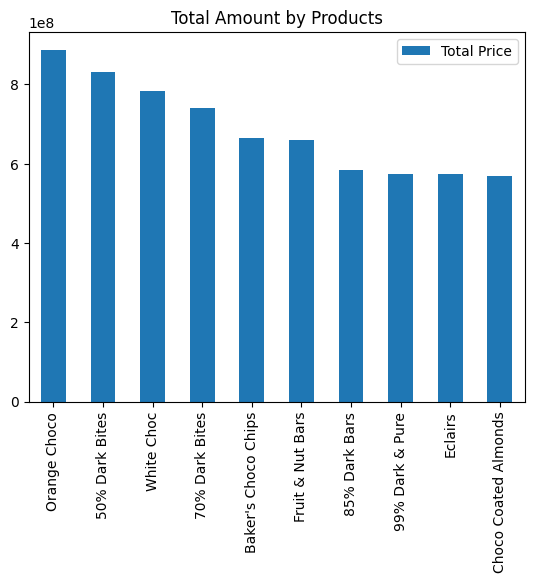

In [13]:
#Products that generates the highest revenue
print('Top ten products with the highest revenue')
sales.groupby('Product').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending = False).head(10).plot(kind='bar')
plt.title('Total Amount by Products')
plt.xlabel('')

In [14]:
#Number of Locations where our business operates
sales['Geography'].nunique()

6

Text(0.5, 1.0, 'Sales Frequency by Location')

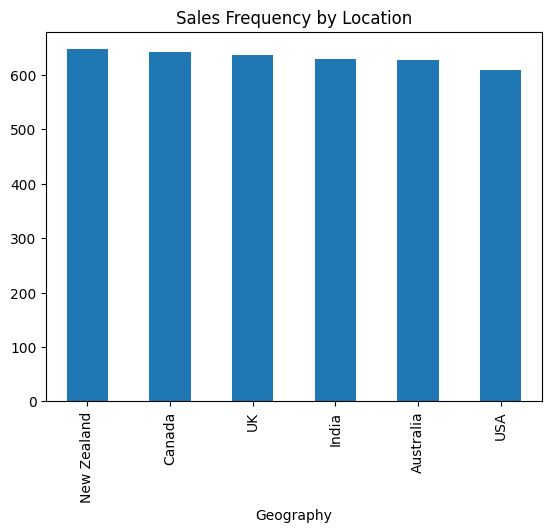

In [15]:
#Bar plot showing sales frequency by locations
sales['Geography'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Sales Frequency by Location')

In [16]:
#Total sales amount by locations
sales.groupby('Geography').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending = False)

,Total Price
Geography,
India,2234182748
New Zealand,2084411952
Australia,2009204904
Canada,1954810389
UK,1922557252
USA,1878754248


Text(0.5, 0, '')

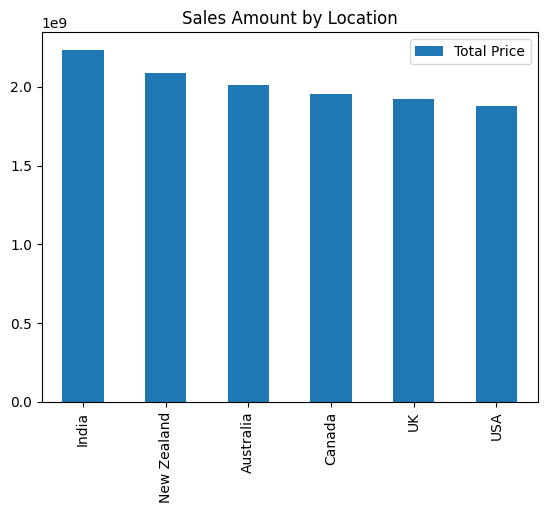

In [17]:
#Bar plot showing total sales amount by locations
sales.groupby('Geography').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending = False).plot(kind = 'bar')
plt.title('Sales Amount by Location')
plt.xlabel('')

Since India generates the highest revenue, we investigate it further.

In [18]:
mask = (sales['Geography'] == 'India')
sales_india = sales.loc[mask]
print('Sales Distribution In India')
print('\n')
print(sales_india.head(20))
print('\n')
print('Top 10 most popular Products in India')
print('\n')
sales_india_popular = sales_india.groupby('Product').agg({'Boxes': 'sum'}).sort_values(by = 'Boxes', ascending = False).head(10)
print(sales_india_popular.rename(columns = {'Boxes': 'Products Sold'}))
print('\n')
print('Top 10 most valuable Products in India')
sales_india_valuable = sales_india.groupby('Product').agg({'Total Price': 'sum'}).sort_values(by = 'Total Price', ascending = False).head(10)
print(sales_india_valuable)
print('\n')
print('Top ten performing Sales persons in India')
sales_india_performance = sales_india.groupby('Sales Person').agg({'Total Price': 'sum'}).sort_values(by = 'Total Price', ascending = False).head(10).rename(columns = {'Total Price': 'Total Revenue Generated'})
print(sales_india_performance)

Sales Distribution In India


            Sales Person Geography               Product       Date  Amount  Boxes  Total Price  Year  Month
5    Rafaelita Blaksland     India         85% Dark Bars 2021-01-01    2184    122       266448  2021      1
14           Brien Boise     India               Eclairs 2021-01-01   15596    975     15206100  2021      1
15        Curtice Advani     India           After Nines 2021-01-01    8561    330      2825130  2021      1
31           Van Tuxwell     India   Organic Choco Syrup 2021-01-05   17248    664     11452672  2021      1
40          Jan Morforth     India          Orange Choco 2021-01-05    3059    279       853461  2021      1
42        Wilone O'Kielt     India    Smooth Sliky Salty 2021-01-06     644     34        21896  2021      1
43          Ches Bonnell     India           After Nines 2021-01-06    4935    171       843885  2021      1
53       Madelene Upcott     India    Manuka Honey Choco 2021-01-07   11228    388      4356464  2

In [19]:
#Performance of each products across all Locations
print('Product Sales Across Locations')
pd.pivot_table(data = sales, values = 'Total Price', index = 'Product', columns = 'Geography', aggfunc = 'sum')

Product Sales Across Locations


Geography,Australia,Canada,India,New Zealand,UK,USA
Product,,,,,,
50% Dark Bites,130843923,210054719,104700470,100213491,101333421,183769698
70% Dark Bites,95879826,79932335,125877346,211621529,151125527,75483590
85% Dark Bars,71465009,92810151,182334957,52104094,72181137,112386589
99% Dark & Pure,127893815,105401212,64986446,119224945,85034243,72101281
After Nines,45125059,80681524,63101857,68099248,40835907,54248243
Almond Choco,45843686,92272838,85474172,90454651,76007078,76603240
Baker's Choco Chips,89963909,109528195,147460593,97636469,127592311,92375878
Caramel Stuffed Bars,68262551,64834140,77184933,65235632,100918853,54182254
Choco Coated Almonds,104874147,95726568,71886647,129724448,95025238,71973587


In [20]:
#Number of sales persons
sales['Sales Person'].nunique()

25

In [21]:
#Sales persons
sales['Sales Person'].unique()

array(['Barr Faughny', 'Dennison Crosswaite', 'Karlen McCaffrey',
       'Beverie Moffet', 'Rafaelita Blaksland', 'Oby Sorrel',
       'Dotty Strutley', 'Brien Boise', 'Curtice Advani',
       'Madelene Upcott', "Wilone O'Kielt", 'Jehu Rudeforth',
       'Camilla Castle', 'Andria Kimpton', 'Kelci Walkden',
       'Husein Augar', 'Van Tuxwell', "Marney O'Breen", 'Kaine Padly',
       'Jan Morforth', 'Ches Bonnell', 'Gunar Cockshoot', 'Gigi Bohling',
       'Roddy Speechley', 'Mallorie Waber'], dtype=object)

In [22]:
#No of Products sold by every sales Person
sale_man_count = sales['Sales Person'].value_counts()
#Sales people with more than 150 sales
sale_man_prod = sale_man_count[sale_man_count >= 150]
sales_person_df = sales.loc[sale_man_prod]
sales_person_df

,Sales Person,Geography,Product,Date,Amount,Boxes,Total Price,Year,Month
160,Brien Boise,UK,50% Dark Bites,2021-01-20,784,49,38416,2021,1
157,Wilone O'Kielt,New Zealand,Raspberry Choco,2021-01-19,5873,267,1568091,2021,1
156,Ches Bonnell,India,Manuka Honey Choco,2021-01-19,5110,155,792050,2021,1
156,Ches Bonnell,India,Manuka Honey Choco,2021-01-19,5110,155,792050,2021,1
156,Ches Bonnell,India,Manuka Honey Choco,2021-01-19,5110,155,792050,2021,1
155,Gunar Cockshoot,USA,After Nines,2021-01-19,3087,111,342657,2021,1
155,Gunar Cockshoot,USA,After Nines,2021-01-19,3087,111,342657,2021,1
154,Curtice Advani,Australia,Baker's Choco Chips,2021-01-19,742,53,39326,2021,1
154,Curtice Advani,Australia,Baker's Choco Chips,2021-01-19,742,53,39326,2021,1
153,Kaine Padly,UK,Spicy Special Slims,2021-01-19,8218,294,2416092,2021,1


Text(0.5, 1.0, 'Sales Agent Performance Across time')

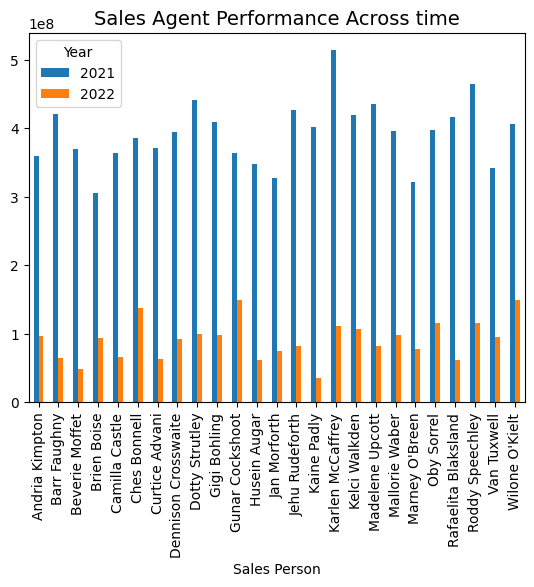

In [23]:
pd.pivot_table(data = sales, values = 'Total Price', index = 'Sales Person', columns = 'Year', aggfunc = 'sum').plot(kind = 'bar')
plt.title('Sales Agent Performance Across time', size = 14)

Wilone O'keit was the best sales agent in 2022 while the best performing agent in 2021 was Karlen McCaffery. We investigate our best sales agents further in the following blocks.

In [24]:
#Get info on best sales persons from 2021 and 2022
best_sales_person = sales[(sales['Sales Person'] == 'Karlen McCaffrey') | (sales['Sales Person'] == "Wilone O'Kielt")]
best_sales_person

,Sales Person,Geography,Product,Date,Amount,Boxes,Total Price,Year,Month
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269,1446144,2021,1
11,Wilone O'Kielt,New Zealand,Organic Choco Syrup,2021-01-01,6377,246,1568742,2021,1
22,Karlen McCaffrey,USA,Raspberry Choco,2021-01-01,3052,204,622608,2021,1
25,Karlen McCaffrey,UK,Orange Choco,2021-01-04,147,11,1617,2021,1
37,Wilone O'Kielt,USA,Orange Choco,2021-01-05,4284,306,1310904,2021,1
42,Wilone O'Kielt,India,Smooth Sliky Salty,2021-01-06,644,34,21896,2021,1
60,Karlen McCaffrey,India,85% Dark Bars,2021-01-08,9562,479,4580198,2021,1
84,Wilone O'Kielt,New Zealand,Spicy Special Slims,2021-01-12,5306,253,1342418,2021,1
99,Karlen McCaffrey,UK,Milk Bars,2021-01-14,6881,222,1527582,2021,1
120,Wilone O'Kielt,New Zealand,Eclairs,2021-01-14,1211,61,73871,2021,1


In [25]:
#Get the number of boxes sold by each Sales Person
best_sales_person.groupby('Sales Person').agg({'Boxes': 'sum'})

,Boxes
Sales Person,
Karlen McCaffrey,62730
Wilone O'Kielt,56450


In [26]:
best_sales_person.groupby('Product').agg({'Product': 'count'}).rename(columns = {'Product': 'No of Variety of Products'}).sort_values(by = 'No of Variety of Products', ascending = False)

,No of Variety of Products
Product,
Choco Coated Almonds,16
Caramel Stuffed Bars,16
Mint Chip Choco,16
Raspberry Choco,16
70% Dark Bites,15
99% Dark & Pure,15
Manuka Honey Choco,15
Smooth Sliky Salty,14
85% Dark Bars,14


In [27]:
rev_gen = sum(best_sales_person['Total Price'])
print('Total Revenue generated by our best Sa')
print(f"${rev_gen:,}")

Total Revenue generated by our best Sa
$1,180,332,167
